In [1]:
#Clustering Analysis of Mall Customers

In [2]:
# for basic operations
import numpy as np 
import pandas as pd 


In [3]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading the data and finding the computation time for uploading the dataset

%time data = pd.read_csv('/apps/apps1/a625533/Mall_Customers.csv')

CPU times: user 12.1 ms, sys: 3.27 ms, total: 15.4 ms
Wall time: 23.9 ms


In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# getting to know the shape of the data
print(data.shape)

(200, 5)


# Analysis of the Data

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# checking if the dataset contains any NULL values

data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# Visualization

In [10]:
# counting the unique value count in the gender category

data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
#PIE CHART

In [13]:
import matplotlib.pyplot as plt
# Data to plot
labels = 'female', 'Male'
sizes = [112, 88]
colors = ['gold','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

In [14]:
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


([<matplotlib.patches.Wedge at 0x7fb48652c6a0>,
 [Text(-0.585432,-1.04751,'female'), Text(0.536646,0.960214,'Male')],
 [Text(-0.341502,-0.611045,'56.0%'), Text(0.292716,0.523753,'44.0%')])

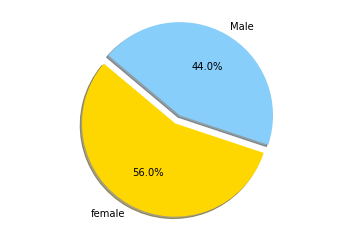

In [15]:
plt.axis('equal')
plt.show()

# Clustering Analysis

In [16]:
# making a data to be clustered (it should be only two-dimensional)

# lets say it x
x = data.iloc[:, [3, 4]].values

In [17]:
print(x.shape)

(200, 2)


# K-mean Clustering

In [19]:
#As you can see, Gender in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [18]:
df = data.drop('Gender', axis=1)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


# Normalizing over the standard deviation¶

In [20]:
#Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. 
#We use standardScaler() to normalize our dataset.

In [21]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
# Clus_dataSet

/export/home/a625533/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/export/home/a625533/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
Clus_dataSet

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

# Modeling

In [23]:
#Apply k-means on our dataset, and take look at cluster labels.

In [25]:
from sklearn.cluster import KMeans 

In [70]:
clusterNum = 
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 4 1 4 3 4 1 2 1 4 1 2 1 4 1 4 3 4 3 2 3 4 1 4 1 4 3 0 3 2 1 4 1 2 1 4 1
 4 3 4 3 2 3 0 3 4 0 0 3 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 3 0 0 3 3 0 0 0 0 0 0 0 3 0 3 3 0 0 0 3 0 3 0 0 0 0 3 0 0 3 0 0
 0 3 0 0 0 3 0 3 0 0 3 0 2 3 4 3 2 1 4 1 4 3 4 1 2 1 4 1 4 1 2 3 2 1 2 3 4
 1 2 1 2 1 4 1 2 1 4 1 4 3 2 1 2 3 4 1 2 3 0 1 4 1 2 1 2 1 4 1 2 3 2 1 2 3
 2 1 4 1 2 1 4 1 2 1 4 3 4 1 2]


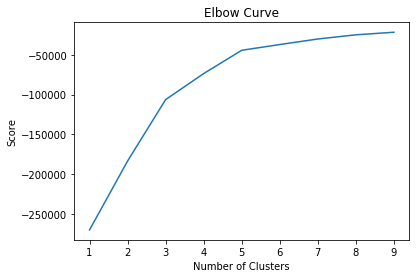

In [103]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Insights

In [30]:
#We assign the labels to each row in dataframe.

In [72]:
df["Clus_km"] = labels
df.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,19,15,39,3
1,2,21,15,81,4
2,3,20,16,6,1
3,4,23,16,77,4
4,5,31,17,40,3


In [33]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Clus_km'],
      dtype='object')

In [73]:
df.groupby('Clus_km').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,83.000000,43.145161,54.048387,52.790323
1,119.615385,43.282051,68.256410,11.846154
2,132.740741,31.370370,73.925926,90.703704
3,91.525000,41.075000,56.825000,37.000000
4,95.125000,28.656250,57.187500,74.250000


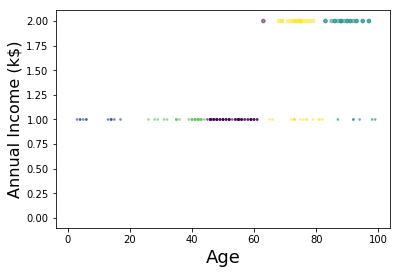

In [78]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income (k$)', fontsize=16)

plt.show()


# Hierarchical Clustering

In [36]:
#Visualization

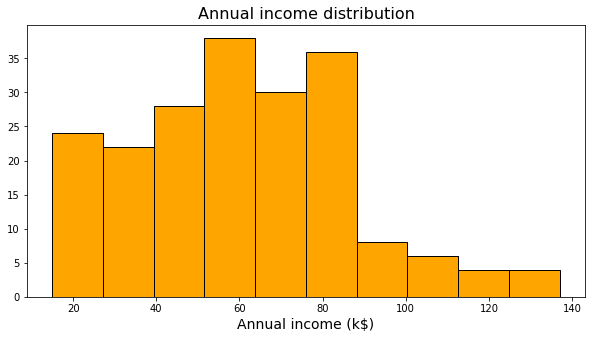

In [101]:
plt.figure(figsize=(10,5))
plt.title("Annual income distribution",fontsize=16)
plt.xlabel ("Annual income (k$)",fontsize=14)
plt.grid(False)
plt.hist(df1['Annual Income (k$)'],color='orange',edgecolor='k')
plt.show()

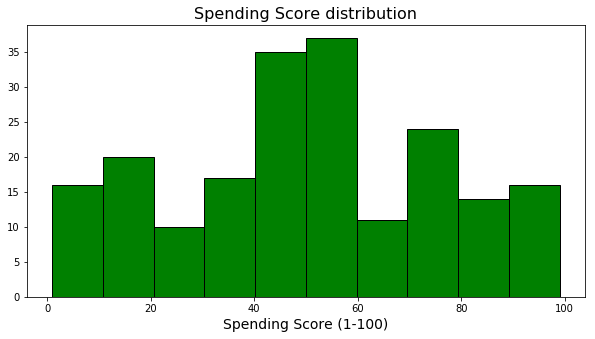

In [102]:
plt.figure(figsize=(10,5))
plt.title("Spending Score distribution",fontsize=16)
plt.xlabel ("Spending Score (1-100)",fontsize=14)
# plt.grid(False)
plt.hist(df1['Spending Score (1-100)'],color='green',edgecolor='k')
plt.show()

In [41]:
#Is there a definitive correlation between annual income and spending score?

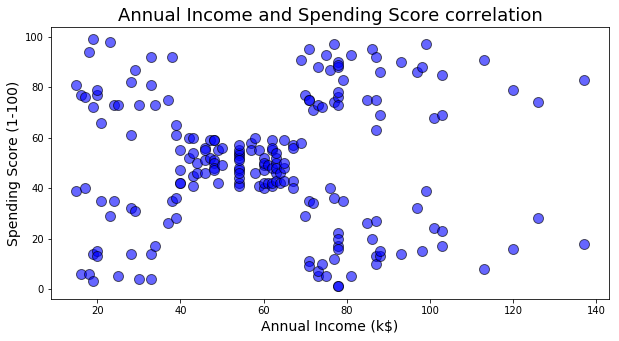

In [94]:
plt.figure(figsize=(10,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

In [44]:
#correlation between age and spending score

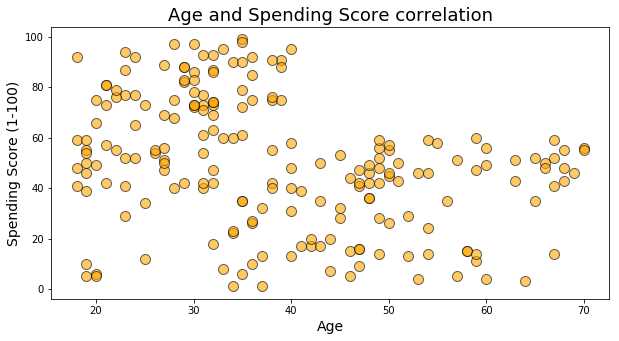

In [95]:
plt.figure(figsize=(10,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.scatter(df1['Age'],df1['Spending Score (1-100)'],color='orange',edgecolor='k',alpha=0.6, s=100)
plt.show()

In [68]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [47]:
#we will explore cluserting the customers based on their annual income and spending score to see if there are distinguisbale clusters which the mall can target

# Dendogram

In [86]:
df1=pd.read_csv('/apps/apps1/a625533/Mall_Customers.csv')

In [93]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:
X = df1.iloc[:,[3,4]].values

In [97]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

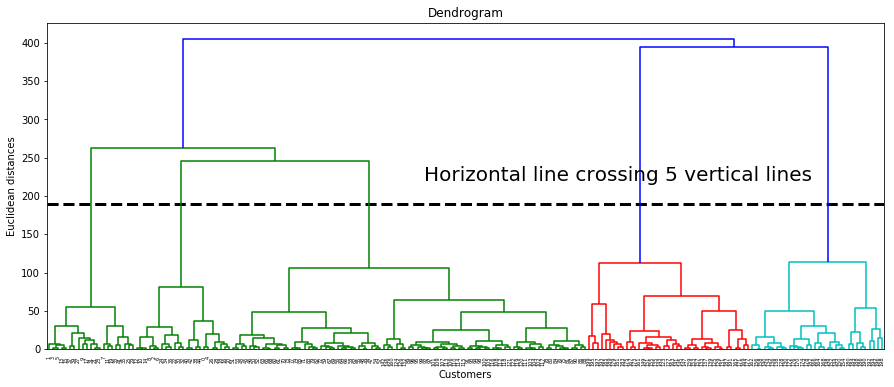

In [98]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [50]:
#The optimal number of clusters can be found from a Dendogram is a simple manner.

In [64]:
#Hierarchical Clustering

In [99]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Plot the clusters and label customer types

In [ ]:
# Careful - high income but low spenders
# Standard - middle income and middle spenders
# Target group - middle-to-high income and high spenders (should be targeted by the mall)
# Careless - low income but high spenders (should be avoided because of possible credit risk)
# Sensible - low income and low spenders
# 

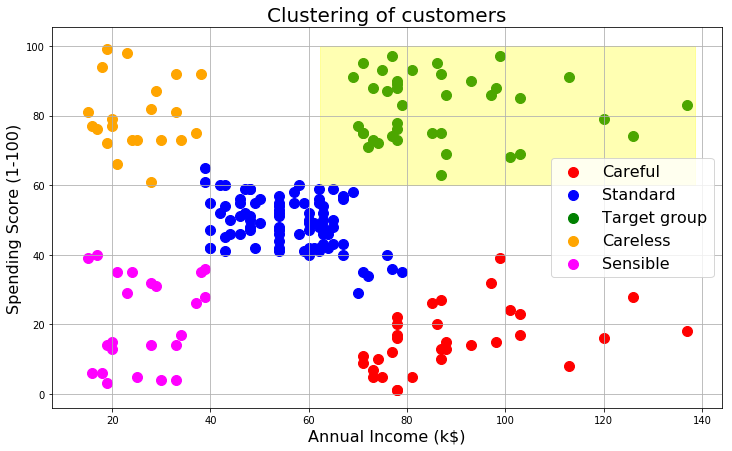

In [100]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title('Clustering of customers',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()